In [1]:
library(gamlss);

Loading required package: splines

Loading required package: gamlss.data


Attaching package: ‘gamlss.data’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: gamlss.dist

Loading required package: nlme

Loading required package: parallel

 **********   GAMLSS Version 5.4-20  ********** 

For more on GAMLSS look at https://www.gamlss.com/

Type gamlssNews() to see new features/changes/bug fixes.




# weeks_3_and_4__practicals.pdf

## 3 The abdom data.

```
R data file: abdom in package gamlss.data of dimensions 610 × 2
variables
y : abdominal circumference
x : gestational age
purpose: to demonstrate the fitting of a simple regression type model in GAMLSS
```

Fit different response distributions and choose the ‘best’ model according to the GAIC criterion:
1. Load the abdom data and print the variable names.

In [4]:
data(abdom)
colnames(abdom)
summary(abdom)

[1] "y" "x"

       y               x        
 Min.   : 56.0   Min.   :12.29  
 1st Qu.:153.0   1st Qu.:20.00  
 Median :227.0   Median :27.00  
 Mean   :226.7   Mean   :27.27  
 3rd Qu.:303.8   3rd Qu.:34.43  
 Max.   :404.0   Max.   :42.43  

2. Fit the normal distribution model, using pb() to fit P-spline smoothers for the predictors
for μ and σ with automatic selection of smoothing parameters:

In [5]:
mNO<- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=NO)

GAMLSS-RS iteration 1: Global Deviance = 4786.697 
GAMLSS-RS iteration 2: Global Deviance = 4785.695 
GAMLSS-RS iteration 3: Global Deviance = 4785.696 


3. Try fitting alternative distributions:

    (a) two-parameter distributions: GA, IG, GU, RG, LO,
   
    Apply pb() to all parameters of each distribution. Make sure to use different model names.

In [6]:
mGA <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=GA);
mIG <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=IG);
mGU <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=GU);
mRG <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=RG);
mLO <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=LO);

GAMLSS-RS iteration 1: Global Deviance = 4770.537 
GAMLSS-RS iteration 2: Global Deviance = 4771.717 
GAMLSS-RS iteration 3: Global Deviance = 4771.818 
GAMLSS-RS iteration 4: Global Deviance = 4771.826 
GAMLSS-RS iteration 5: Global Deviance = 4771.826 
GAMLSS-RS iteration 1: Global Deviance = 4770.621 
GAMLSS-RS iteration 2: Global Deviance = 4770.198 
GAMLSS-RS iteration 3: Global Deviance = 4770.25 
GAMLSS-RS iteration 4: Global Deviance = 4770.25 
GAMLSS-RS iteration 1: Global Deviance = 5028.577 
GAMLSS-RS iteration 2: Global Deviance = 4960.755 
GAMLSS-RS iteration 3: Global Deviance = 4960.388 
GAMLSS-RS iteration 4: Global Deviance = 4960.503 
GAMLSS-RS iteration 5: Global Deviance = 4960.518 
GAMLSS-RS iteration 6: Global Deviance = 4960.524 
GAMLSS-RS iteration 7: Global Deviance = 4960.522 
GAMLSS-RS iteration 8: Global Deviance = 4960.523 
GAMLSS-RS iteration 1: Global Deviance = 4947.063 
GAMLSS-RS iteration 2: Global Deviance = 4866.599 
GAMLSS-RS iteration 3: Global Dev

In [7]:
# Summary of the model
summary(mGA)

******************************************************************
Family:  c("GA", "Gamma") 

Call:  gamlss(formula = y ~ pb(x), sigma.formula = ~pb(x),  
    family = GA, data = abdom) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  log
Mu Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.9278642  0.0088965   441.5   <2e-16 ***
pb(x)       0.0515354  0.0003028   170.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.574377   0.095777 -26.879  < 2e-16 ***
pb(x)       -0.009722   0.003350  -2.902  0.00385 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
NOTE: Additive smoothing terms exist in t

(b) three-parameter distributions: PE, TF, BCCG,

In [8]:
mPE <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=PE)
mTF <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=TF)
mBCCG <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=BCCG)

GAMLSS-RS iteration 1: Global Deviance = 4796.366 
GAMLSS-RS iteration 2: Global Deviance = 4779.44 
GAMLSS-RS iteration 3: Global Deviance = 4779.413 
GAMLSS-RS iteration 4: Global Deviance = 4779.412 
GAMLSS-RS iteration 1: Global Deviance = 4780.234 
GAMLSS-RS iteration 2: Global Deviance = 4777.493 
GAMLSS-RS iteration 3: Global Deviance = 4777.519 
GAMLSS-RS iteration 4: Global Deviance = 4777.52 
GAMLSS-RS iteration 1: Global Deviance = 4779.463 
GAMLSS-RS iteration 2: Global Deviance = 4778.688 
GAMLSS-RS iteration 3: Global Deviance = 4778.705 
GAMLSS-RS iteration 4: Global Deviance = 4778.701 
GAMLSS-RS iteration 5: Global Deviance = 4778.7 


(c) four-parameter distributions: BCT, BCPE.

In [9]:
mBCT <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=BCT)
mBCPE <- gamlss(y~pb(x), sigma.fo=~pb(x), data=abdom, family=BCPE)

GAMLSS-RS iteration 1: Global Deviance = 4771.925 
GAMLSS-RS iteration 2: Global Deviance = 4771.039 
GAMLSS-RS iteration 3: Global Deviance = 4770.999 
GAMLSS-RS iteration 4: Global Deviance = 4770.994 
GAMLSS-RS iteration 5: Global Deviance = 4770.993 
GAMLSS-RS iteration 1: Global Deviance = 4777.47 
GAMLSS-RS iteration 2: Global Deviance = 4773.218 
GAMLSS-RS iteration 3: Global Deviance = 4773.273 
GAMLSS-RS iteration 4: Global Deviance = 4773.274 
GAMLSS-RS iteration 5: Global Deviance = 4773.274 


4. Compare the fitted models using GAIC with each of the penalties k=2, k=3 and k=log(length(abdom$y)),

In [28]:
# eg
k <- log(length(abdom$y))
k <- 2.5
print(k)
GAIC(mNO,mGA,mIG,mGU,mRG,mLO,mPE,mTF,mBCCG,mBCT,mBCPE,k=k)

[1] 2.5


,df,AIC
,<dbl>,<dbl>
mLO,7.797904,4798.774
mTF,8.789107,4799.492
mBCT,11.761624,4800.397
mPE,8.784598,4801.373
mBCPE,11.669290,4802.447
mNO,7.681399,4804.900
mBCCG,10.555570,4805.089
mIG,15.360001,4808.650
mGA,14.810311,4808.852


5. Check the residuals for your chosen model, say m, by plot(m) and wp(m).

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  0.01517214 
                       variance   =  0.9901834 
               coef. of skewness  =  0.1444748 
               coef. of kurtosis  =  2.789663 
Filliben correlation coefficient  =  0.9983889 
******************************************************************


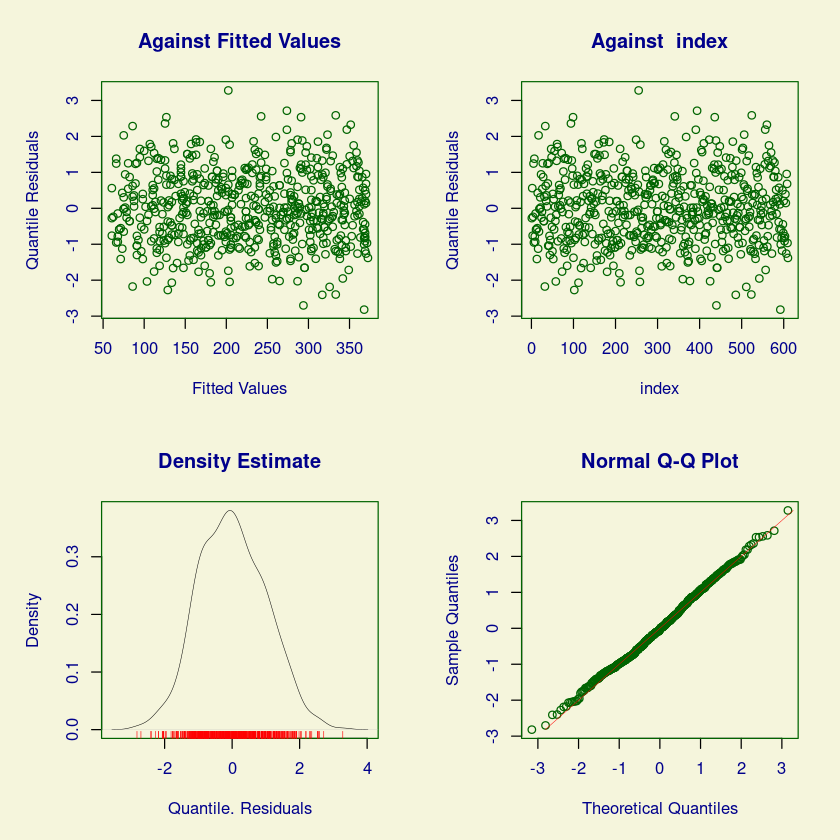

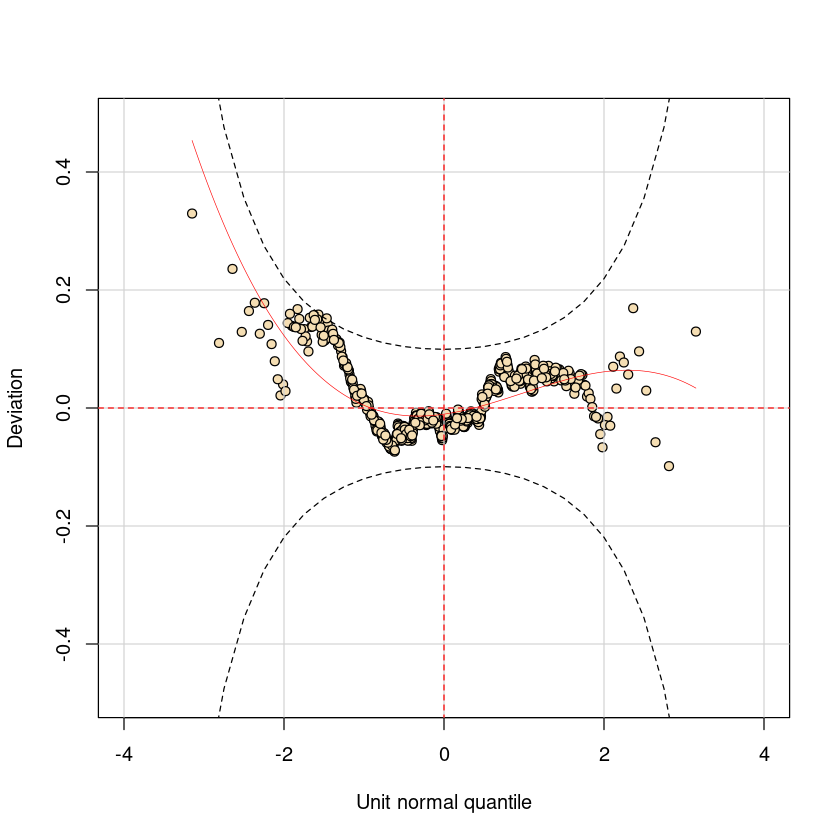

In [26]:
plot(mLO) 
wp(mLO)

In [ ]:
6. For a chosen model, say m, look at the total effective degrees of freedom edfAll(m), plot the
fitted parameters, fittedPlot(m,x=abdom,$x), and plot the data by plot(y∼x,data=abdom),
and fitted μ against x, lines(fitted(m)∼x, data=abdom).

$mu
$mu$`pb(x)`
[1] 5.796263


$sigma
$sigma$`pb(x)`
[1] 2.001641

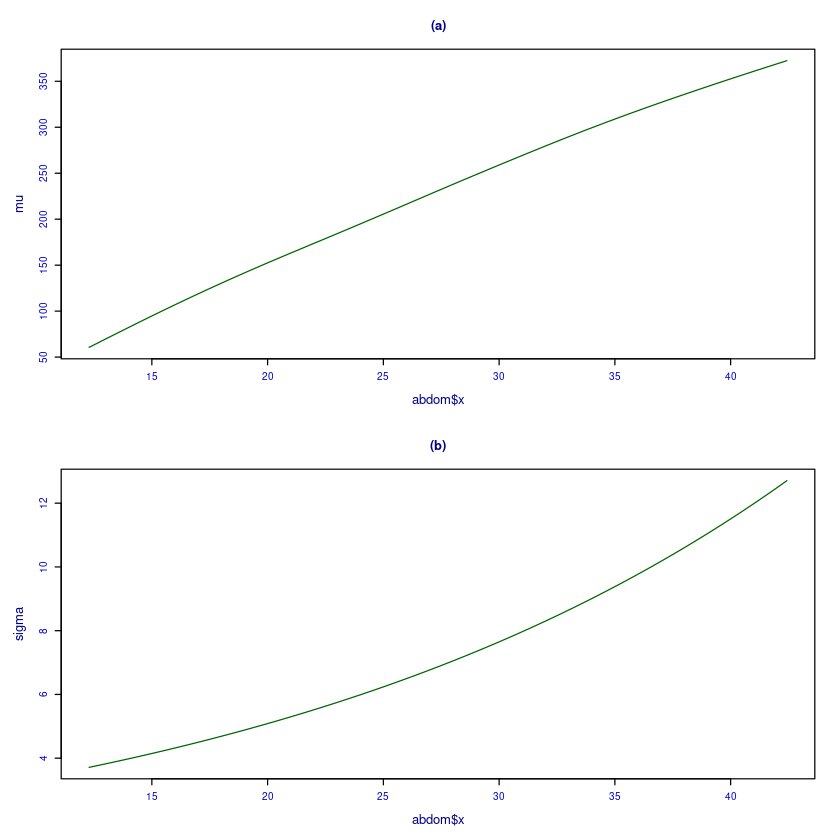

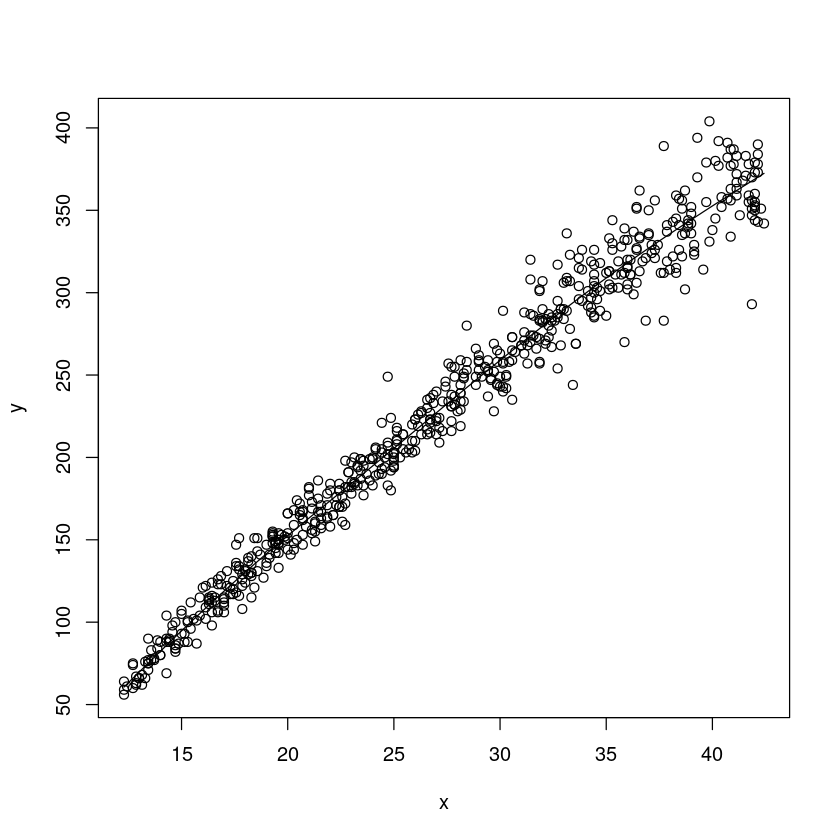

In [29]:
edfAll(mLO)
fittedPlot(mLO,x=abdom$x)
plot(y~x,data=abdom)
lines(fitted(mLO)~x, data=abdom)

7. For a chosen model, examine the centile curves using centiles(m,abdom$x).

% of cases below  0.4 centile is  0.3278689 
% of cases below  2 centile is  1.47541 
% of cases below  10 centile is  7.868852 
% of cases below  25 centile is  27.04918 
% of cases below  50 centile is  50.65574 
% of cases below  75 centile is  73.77049 
% of cases below  90 centile is  89.01639 
% of cases below  98 centile is  98.19672 
% of cases below  99.6 centile is  99.67213 


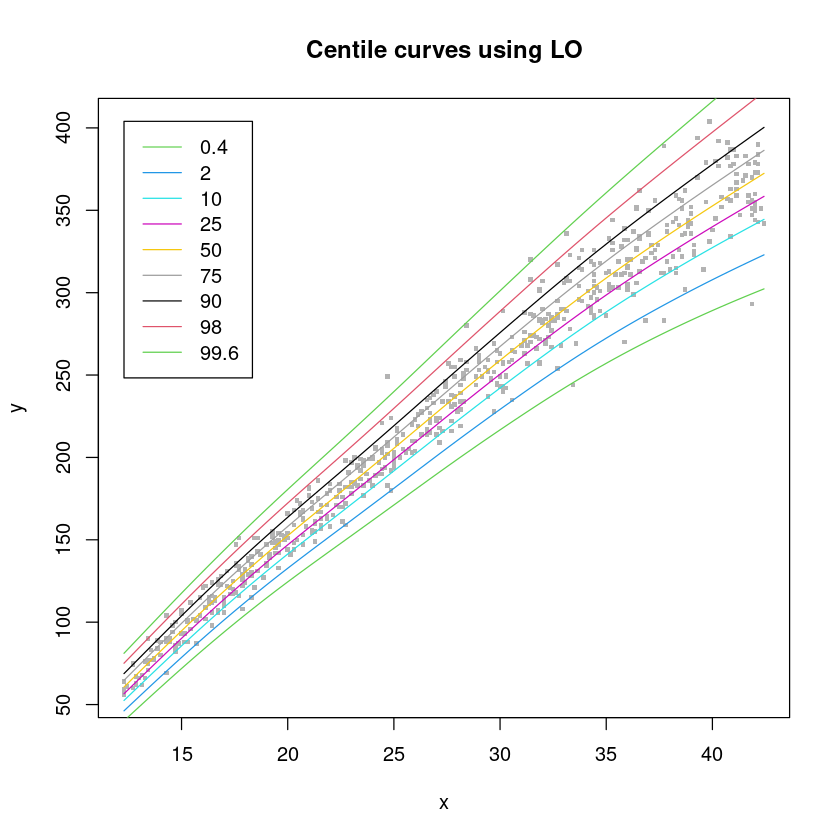

In [30]:
centiles(mLO,abdom$x)

## 4 The air quality data.
The air quality data: The data set airquality is one of the data frames available in R within
the standard package datasets. It has the daily air quality measurements in New York, from
May to September 1973.
```
R data file: airquality in package datasets of dimensions 154 × 6
variables
Ozone : in ppb
Solar.R : in lang
Wind : in mph
Temp : in F
Month : Month (1–12)
Day : Day of month (1–31)
purpose: to demonstrate the need for smooth functions.
```

(a) Here we will use Ozone as the response variable and Solar.R, Wind and Temp as explanatory
variables. (We will not consider Month and Day.) The data can be plotted using:

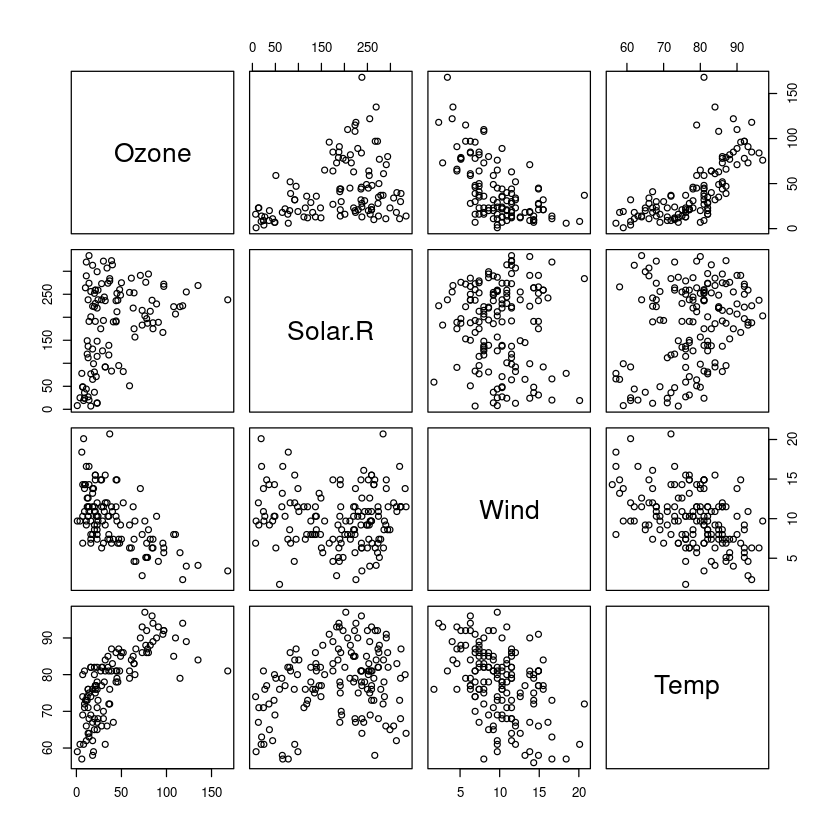

In [31]:
data(airquality)
plot(airquality[,-c(5,6)])

Comment on the plot.


(b) To fit a standard regression model (i.e. with a normal distribution and constant variance)
use the function lm():

In [32]:
# Fit the standard linear model
air.lm <- lm(Ozone~Temp+Wind+Solar.R,data=airquality)
summary(air.lm)


Call:
lm(formula = Ozone ~ Temp + Wind + Solar.R, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.485 -14.219  -3.551  10.097  95.619 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.34208   23.05472  -2.791  0.00623 ** 
Temp          1.65209    0.25353   6.516 2.42e-09 ***
Wind         -3.33359    0.65441  -5.094 1.52e-06 ***
Solar.R       0.05982    0.02319   2.580  0.01124 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.18 on 107 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.5948 
F-statistic: 54.83 on 3 and 107 DF,  p-value: < 2.2e-16


The summary() provides information about the coefficients and their standard errors. To
plot the fitted model terms use termplot():

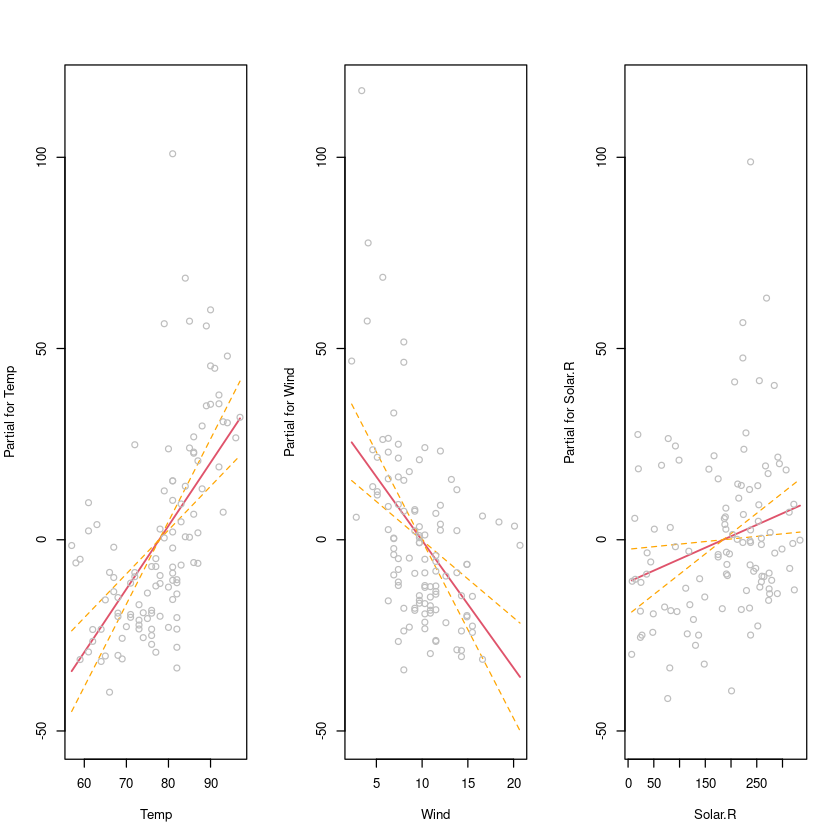

In [33]:
op<-par(mfrow=c(1,3))
termplot(air.lm,partial.resid=TRUE,se=T)
par(op)

Comment on the term plot.

(c) Check the residuals using plot():

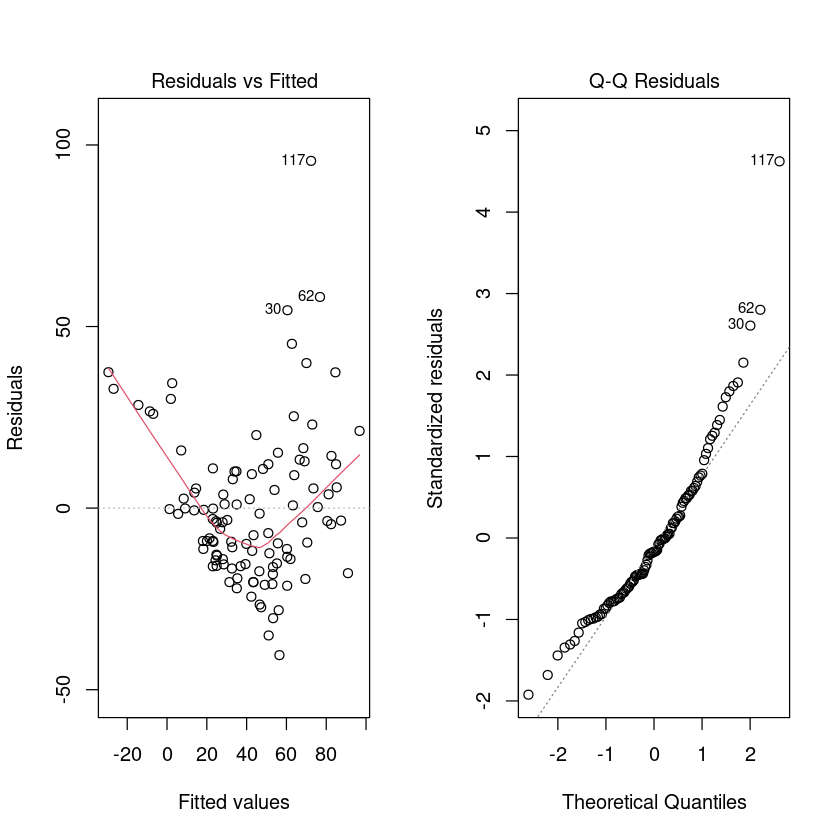

In [34]:
op<-par(mfrow=c(1,2))
plot(air.lm,which=1:2)
par(op)

(d) Fit the same model using the gamlss() function, but note that the data set airquality
has some missing observations (i.e. NA values). The gamlss() function does not work with
NA’s, so before fitting the model the cases with missing values have to be removed:

In [35]:
library(gamlss)
da <- na.omit(airquality) # clear the data of NA's
mno<-gamlss(Ozone~Temp+Wind+Solar.R, data=da) # fit the model
summary(mno)

GAMLSS-RS iteration 1: Global Deviance = 988.7171 
GAMLSS-RS iteration 2: Global Deviance = 988.7171 
******************************************************************
Family:  c("NO", "Normal") 

Call:  gamlss(formula = Ozone ~ Temp + Wind + Solar.R, data = da) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -64.34208   22.63560  -2.843  0.00537 ** 
Temp          1.65209    0.24892   6.637 1.40e-09 ***
Wind         -3.33359    0.64251  -5.188 1.03e-06 ***
Solar.R       0.05982    0.02276   2.628  0.00987 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  log
Sigma Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.03474    0.06712   45.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0

Summarize the fitted gamlss model using summary(). Plot the fitted terms using the corresponding
function for gamlss called term.plot():

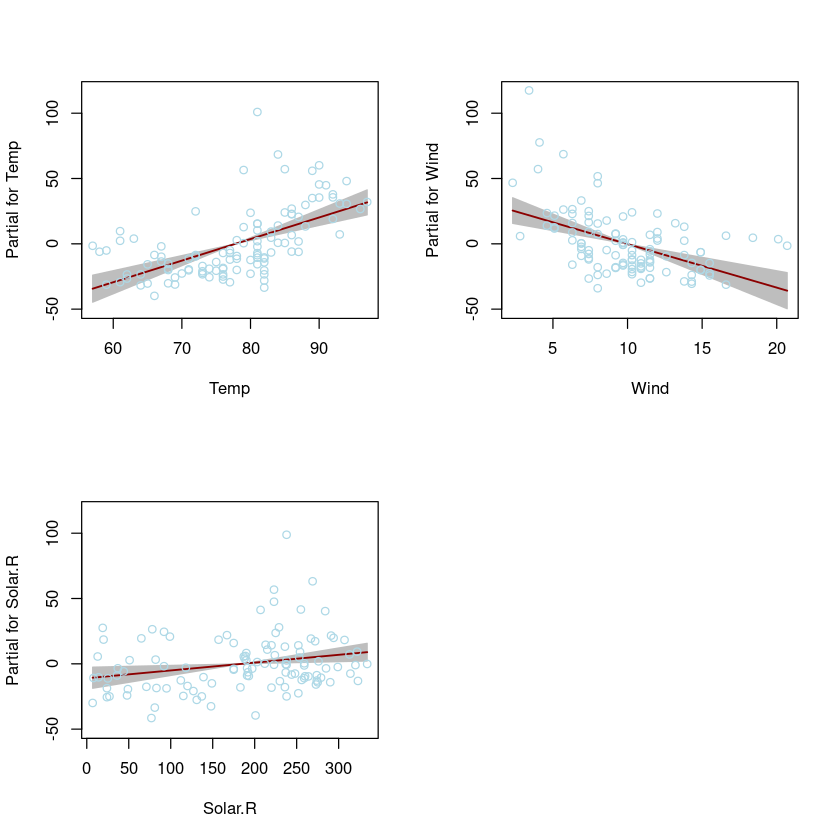

In [36]:
term.plot(mno, pages=1, partial=T) # plot the fitted terms

(e) Check the residuals using the plot() and wp() functions:

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  -2.080501e-14 
                       variance   =  1.009091 
               coef. of skewness  =  1.344119 
               coef. of kurtosis  =  6.189944 
Filliben correlation coefficient  =  0.9557115 
******************************************************************


Warning message in wp(mno):
“Some points are missed out 
increase the y limits using ylim.all”


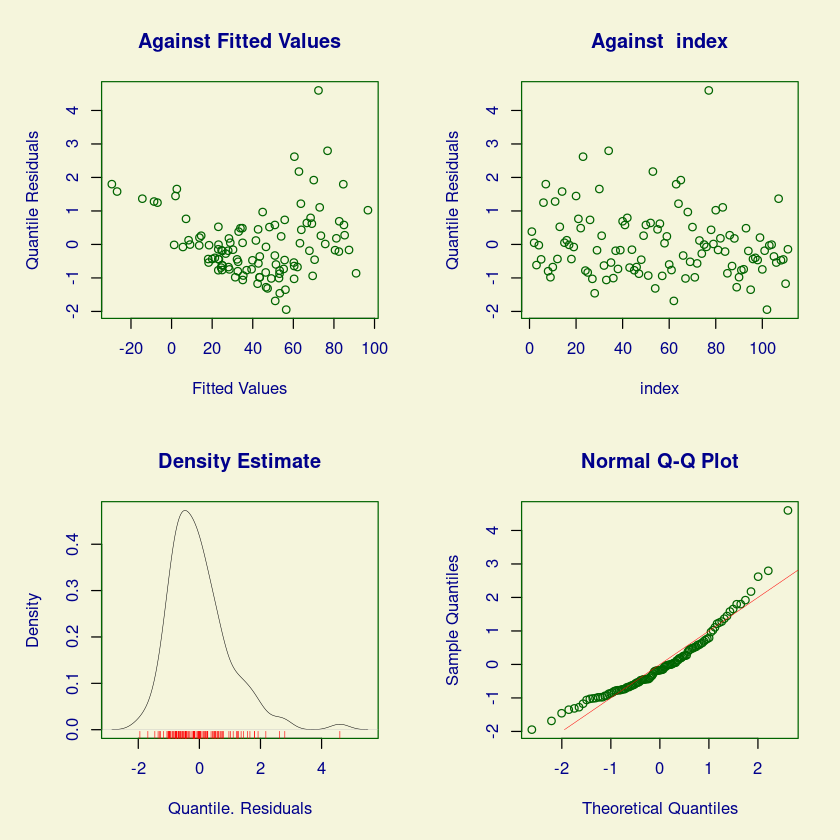

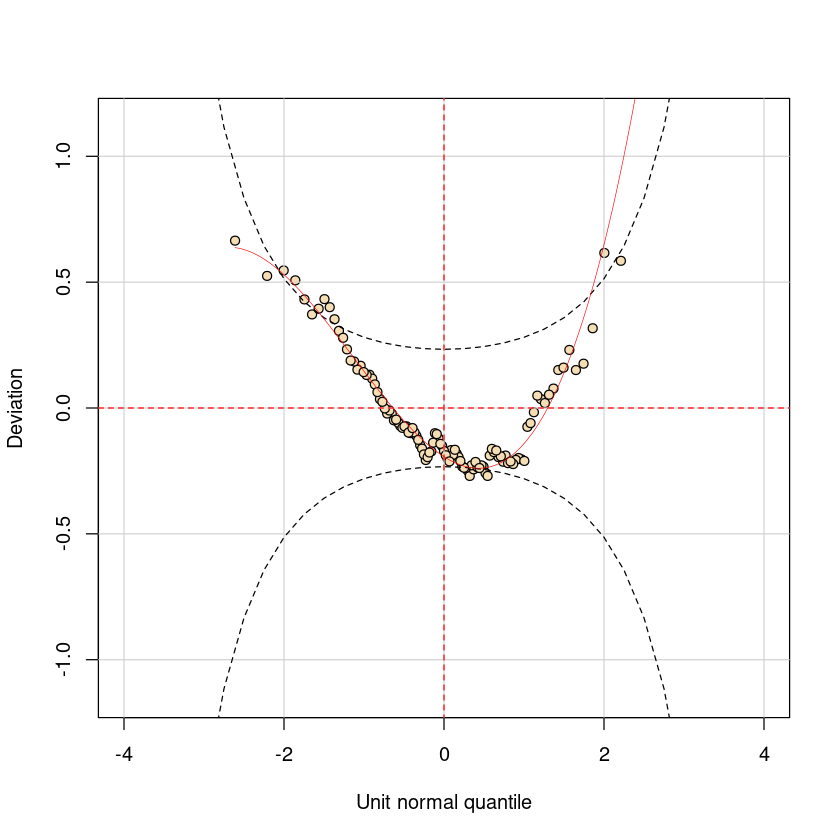

In [37]:
plot(mno)
wp(mno)

Comment on the worm plot. Note the warning message that some points are missed out of
the worm plot. Increase the limits in the vertical axis by using the argument ylim.all=2
in wp().

(f) Since the fitted normal distribution seems not to be correct, try to fit different distributions
(e.g. gamma (GA), inverse Gaussian (IG) and Box Cox Cole and Green (BCCGo)) to the data.
Compare them with the normal distribution using GAIC with penalty k = 2 (i.e. AIC).

In [38]:
# fit different distributions
mga <- gamlss(Ozone~Temp+Wind+Solar.R, data=da, family=GA)
mig <- gamlss(Ozone~Temp+Wind+Solar.R, data=da, family=IG)
mbccg <- gamlss(Ozone~Temp+Wind+Solar.R, data=da, family=BCCGo)
GAIC(mno, mga, mig, mbccg)

GAMLSS-RS iteration 1: Global Deviance = 915.8668 
GAMLSS-RS iteration 2: Global Deviance = 915.8667 
GAMLSS-RS iteration 1: Global Deviance = 1000.104 
GAMLSS-RS iteration 2: Global Deviance = 1000.104 
GAMLSS-RS iteration 1: Global Deviance = 922.3358 
GAMLSS-RS iteration 2: Global Deviance = 915.842 
GAMLSS-RS iteration 3: Global Deviance = 915.5126 
GAMLSS-RS iteration 4: Global Deviance = 915.469 
GAMLSS-RS iteration 5: Global Deviance = 915.4639 
GAMLSS-RS iteration 6: Global Deviance = 915.4629 


,df,AIC
,<dbl>,<dbl>
mga,5,925.8667
mbccg,6,927.4629
mno,5,998.7171
mig,5,1010.1039


(g) For the selected distribution, fit smoothing terms, i.e pb(), for Solar.R, Wind and Temp.

GAMLSS-RS iteration 1: Global Deviance = 893.278 
GAMLSS-RS iteration 2: Global Deviance = 893.4954 
GAMLSS-RS iteration 3: Global Deviance = 893.5247 
GAMLSS-RS iteration 4: Global Deviance = 893.529 
GAMLSS-RS iteration 5: Global Deviance = 893.5299 


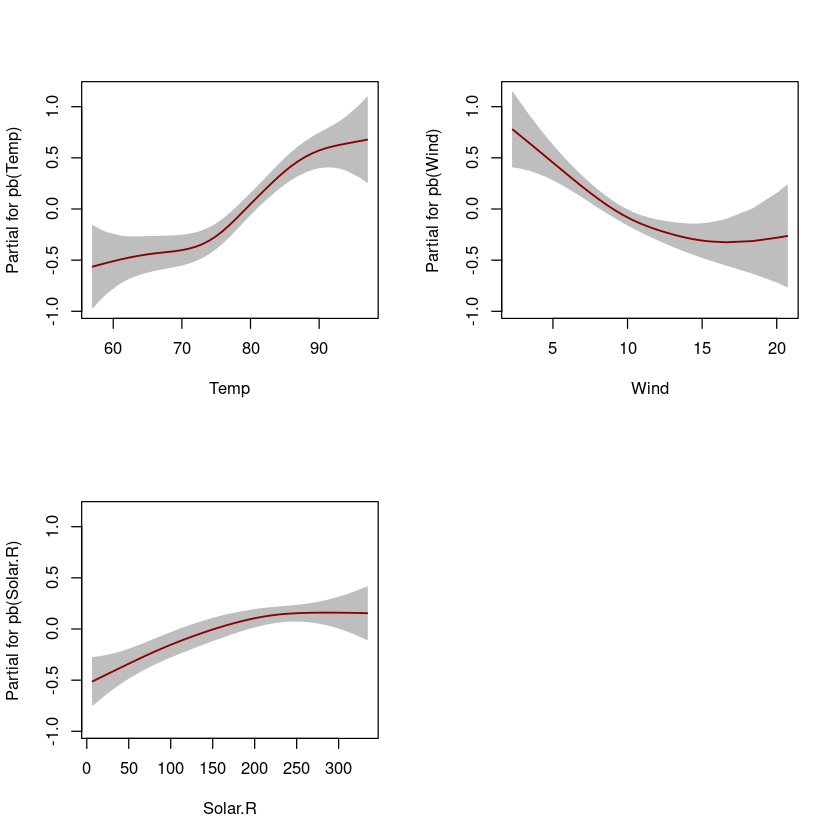

******************************************************************
	      Summary of the Quantile Residuals
                           mean   =  0.001526425 
                       variance   =  1.009721 
               coef. of skewness  =  -0.2246719 
               coef. of kurtosis  =  4.039099 
Filliben correlation coefficient  =  0.9874214 
******************************************************************


Warning message in wp(mga1):
“Some points are missed out 
increase the y limits using ylim.all”


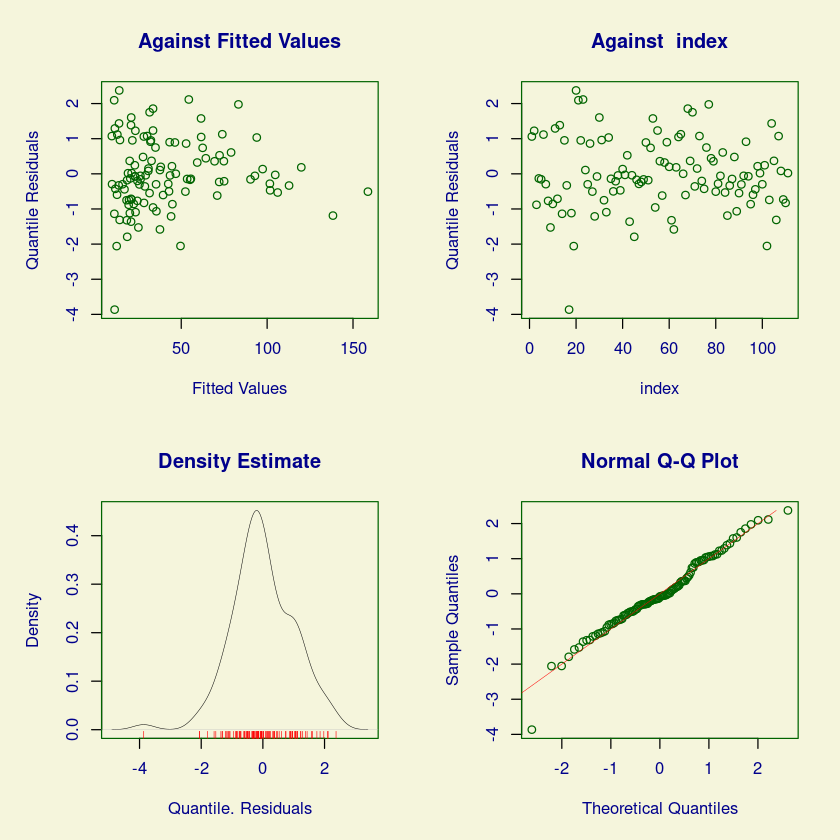

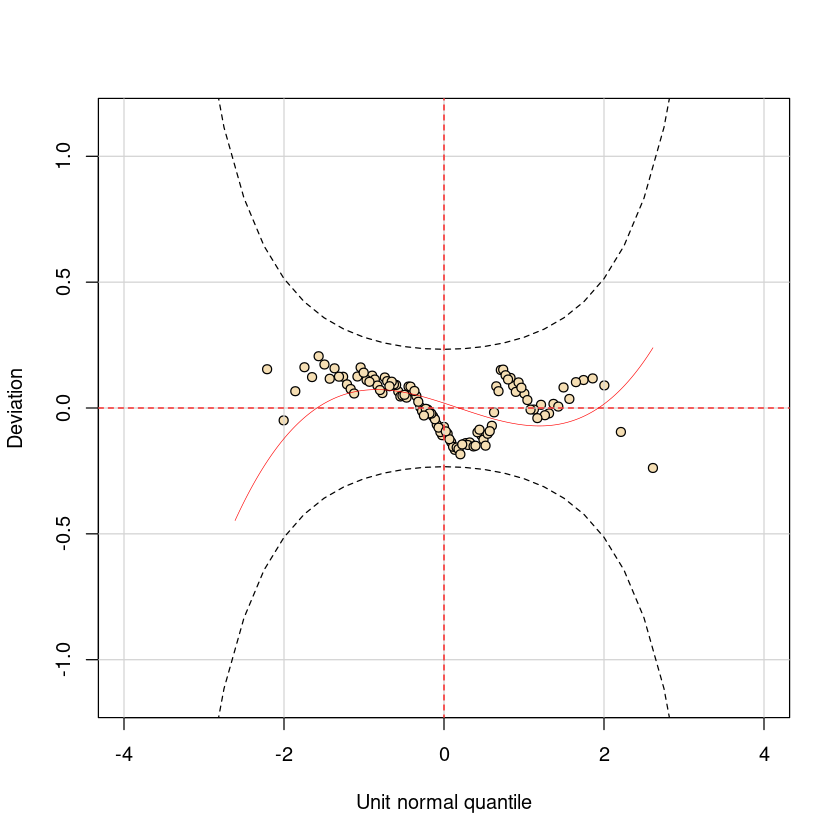

In [39]:
# fit smoothers
mga1=gamlss(Ozone~pb(Temp)+pb(Wind)+pb(Solar.R),data=da,family=GA)
term.plot(mga1, pages=1)
plot(mga1)
wp(mga1)

Is the model improved according to the AIC? Use term.plot() output to see the fitted
smooth functions for the predictor of μ for your chosen distribution. Use plot() and wp()
output to check the residuals.

In [40]:
GAIC(mga1)

[1] 913.9158